In [12]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.data import Sample

#results_folder = os.path.abspath('../simulation_study/results')
max_depth = 4

In [21]:
samples_folder = "../../examples/linguistic_case_study"
X_bp = Sample('%s/folha.txt' % samples_folder, [0, 1, 2, 3, 4])
X_ep = Sample('%s/publico.txt' % samples_folder, [0, 1, 2, 3, 4])

### Estimating models for Brazilian Portuguese (BP) 

In [32]:
cache_folder = "../../examples/linguistic_case_study/cache/smc"
smc_bp = SMC(max_depth, penalty_interval=(0.1, 400), epsilon=0.01, cache_dir=cache_folder)
smc_bp.fit(X_bp)
champion_trees_bp = smc_bp.context_trees
df = pd.DataFrame(columns=['idx', 'num_contexts', 'log_likelihood', 'tree'])
for i, tree in enumerate(smc_bp.context_trees):
    df.loc[len(df)] = [i, tree.num_contexts(), tree.log_likelihood(), tree.to_str()]
print("Champion trees for BP:")
df

Loaded from cache
Champion trees for BP:


,idx,num_contexts,log_likelihood,tree
0,0,74,-76910.193189,0000 0001 0010 0012 002 003 0030 0102 0103 012...
1,1,72,-76914.796755,0000 0001 0010 0012 002 003 0030 0102 0103 012...
2,2,63,-76936.605286,0000 0001 0010 0012 002 003 0030 0102 0103 012...
3,3,60,-76943.979545,0000 0001 0010 0012 002 003 0030 0102 0103 012...
4,4,57,-76951.769934,0000 0001 0010 0012 002 003 0030 0102 0103 012...
5,5,53,-76963.389631,0000 0001 0010 002 003 0030 0102 0103 012 0120...
6,6,42,-76997.888506,0000 0001 0010 002 0030 0102 012 0130 0201 021...
7,7,40,-77009.844813,0000 0001 0010 002 0102 012 0130 0201 021 0210...
8,8,37,-77028.871122,0000 0001 0010 002 0102 012 0130 0201 0210 03 ...
9,9,34,-77052.650126,0000 0001 0010 002 0102 012 0130 0210 03 030 1...


### Estimating models for European Portuguese (BP) 

In [26]:
cache_folder = "../../examples/linguistic_case_study/cache/smc"
smc_ep = SMC(max_depth, penalty_interval=(0.1, 400), epsilon=0.01, cache_dir=cache_folder)
smc_ep.fit(X_ep)
champion_trees_ep = smc_ep.context_trees
df = pd.DataFrame(columns=['idx', 'num_contexts', 'log_likelihood', 'tree'])
for i, tree in enumerate(smc_ep.context_trees):
    df.loc[len(df)] = [i, tree.num_contexts(), tree.log_likelihood(), tree.to_str()]
print("Champion trees for EP")
df

Loaded from cache
Champion trees for EP


,idx,num_contexts,log_likelihood,tree
0,0,57,-82979.998706,0000 0001 0010 0012 002 003 0102 0103 0120 013...
1,1,55,-82984.799570,0000 0001 0010 0012 002 003 0102 0103 0120 013...
2,2,54,-82987.607730,0000 0001 0010 002 003 0102 0103 012 0120 013 ...
3,3,50,-82999.396618,0000 0001 0010 002 003 0102 0103 012 013 0130 ...
4,4,47,-83010.803948,0000 0001 0010 002 003 0102 0103 012 013 0130 ...
5,5,44,-83023.180195,0000 0001 0010 003 0103 012 013 0130 02 021 02...
6,6,38,-83049.382862,0000 0001 0010 003 0103 012 013 0130 02 0210 0...
7,7,35,-83063.057361,0000 0001 0010 003 0103 012 013 0130 02 0210 0...
8,8,32,-83077.606947,0000 0001 0010 012 013 0130 02 0210 03 030 100...
9,9,31,-83083.280344,0000 0001 0010 012 013 02 0210 03 030 100 1210...


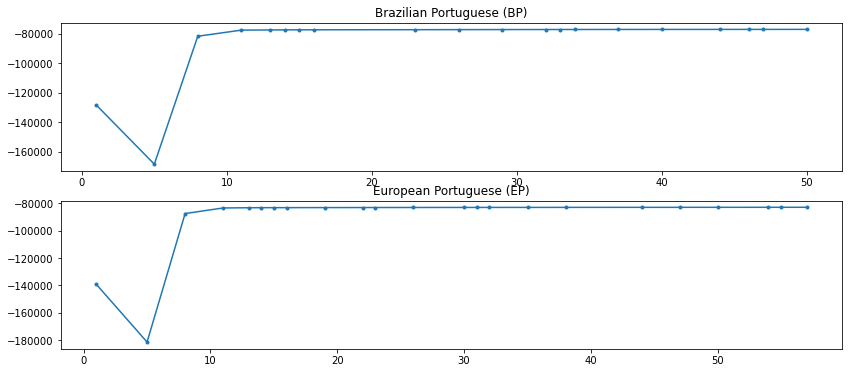

In [31]:
plt.figure(figsize=(14, 6))
txt = ['Brazilian Portuguese (BP)', 'European Portuguese (EP)']
for i, el in enumerate([smc_bp, smc_ep]):
    plt.subplot(2, 1, i+1)
    num_contexts = [t.num_contexts() for t in el.context_trees]
    likelihoods = [t.log_likelihood() for t in el.context_trees]
    plt.plot(num_contexts, likelihoods, marker='.')
    plt.title(txt[i])
plt.show()